In [1]:
# imports
import sys
import numpy as np
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "exp_name": ct.generate_readable_short_id(), #"main_run5_cv5_21data_100trees_40opt_fast",
    "path": "../../",
    "split": "CV", #CV, random_split
    # "test_split": 0.3,
    # "calib_split": 0.1,
    "cv_folds": 5,
    "plot": True,
    "calib_methods": ["RF_d", "RF_opt",
                      "SVM", "LR"
                      "Platt", "ISO", "Beta", "CRF", "VA",
                    #   "tlr", #"Rank", #"Elkan"
                      # "RF_ens_k", "RF_ens_r", 
                      "RF_large",
                      ],
    
    "metrics": ["acc", "ece", "logloss", "tce", "BS", "BS2", "CL", "GL", "IL"], 

    #data
    "data_name": "synthetic2",
    "plot_data": True,
    "data_size": 100,
    "n_copy": 10,
    "n_features": 5,
    "n_informative": 2, 
    "n_redundant": 0, 
    "n_repeated": 0, 

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 1000, 
    "boot_count": 5,

    # RF hyper opt
    "hyper_opt": True,#"Manual",
    "opt_cv":5, 
    "opt_n_iter":20,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [20],
                    "max_depth": np.arange(2, 101).tolist(),
                    # "criterion": ["gini", "entropy"],
                    # "max_features": ["sqrt", "log2"],
                    # "min_samples_split": [2,3,4,5],
                    # "min_samples_leaf": [1,2,3],
                    "oob_score": [False]
                    },
    "laplace": 0, # if set to 1, OOB must be false
    # "n_estimators": 20,
    "oob": False,

    "exp_key": "n_informative",
    "exp_values": [2,4]
}

ct.save_params(params)

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)
ct.save_results(calib_results_dict, params['exp_name'])

exp_param 2 done
exp_param 4 done


In [4]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

In [5]:
tables["tce"]

,RF_d,RF_opt,Platt,ISO,Beta,CRF,VA,RF_large
Data,,,,,,,,
2,0.008087,0.039572,0.039090,0.036693,0.041433,0.040477,0.037791,0.038566
4,0.008134,0.041729,0.044633,0.039858,0.046844,0.044417,0.040459,0.040027
Mean,0.008110,0.040651,0.041862,0.038275,0.044139,0.042447,0.039125,0.039297
Rank,1.000000,5.500000,6.000000,2.000000,8.000000,6.500000,3.500000,3.500000


In [6]:
tables["BS"]

,RF_d,RF_opt,Platt,ISO,Beta,CRF,VA,RF_large
Data,,,,,,,,
2,0.160375,0.192413,0.191143,0.187680,0.192785,0.191661,0.188643,0.190594
4,0.160389,0.193417,0.195642,0.191065,0.197892,0.194477,0.191697,0.192246
Mean,0.160382,0.192915,0.193392,0.189373,0.195338,0.193069,0.190170,0.191420
Rank,8.000000,3.000000,3.000000,7.000000,1.000000,3.000000,6.000000,5.000000


In [7]:
# ct.res_statistics(tables, params["metrics"], f"results/{params['exp_name']}")

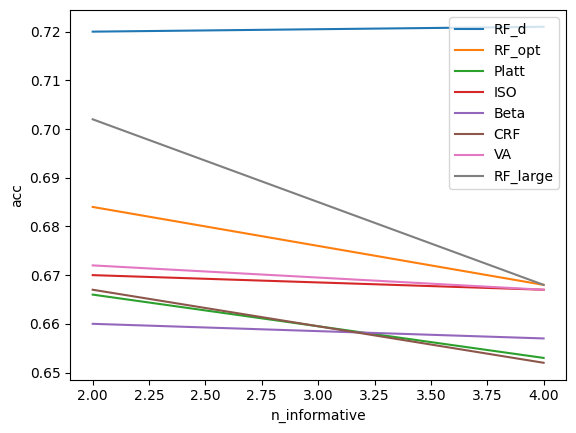

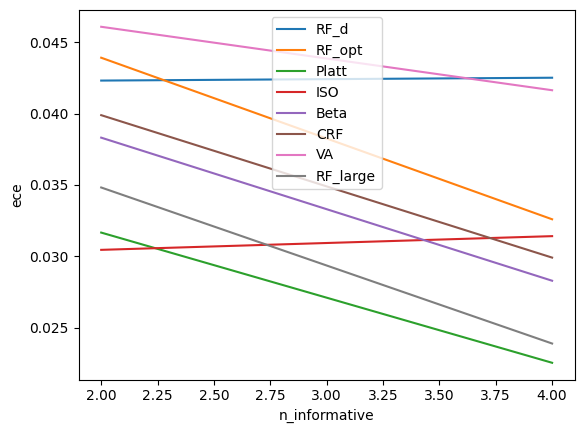

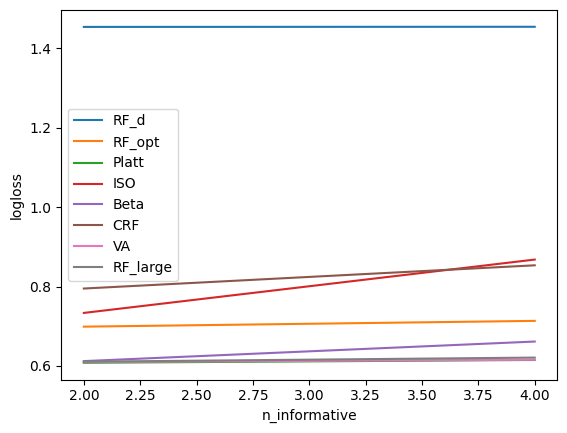

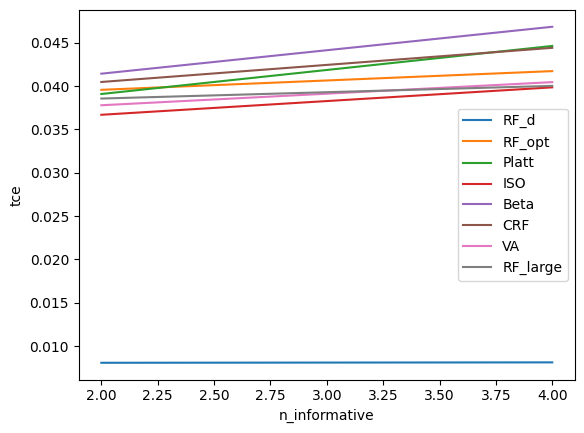

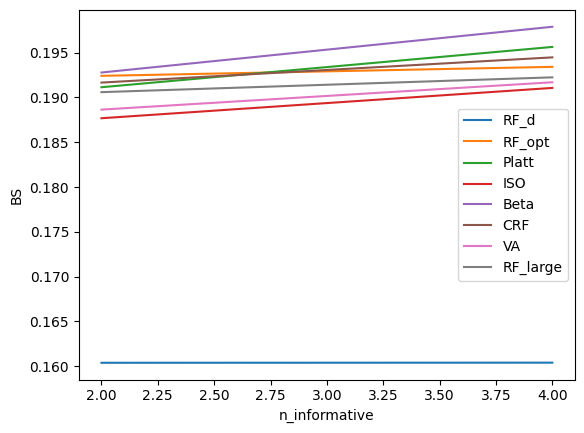

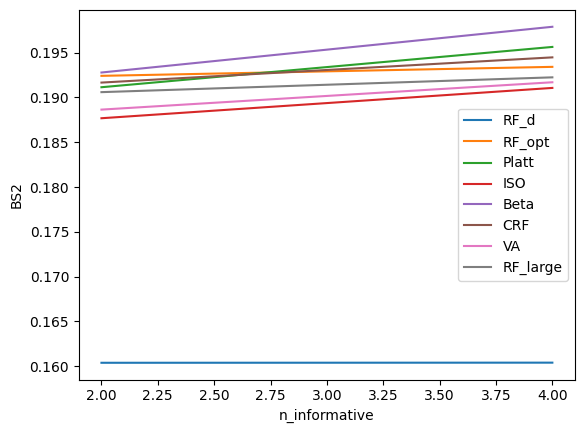

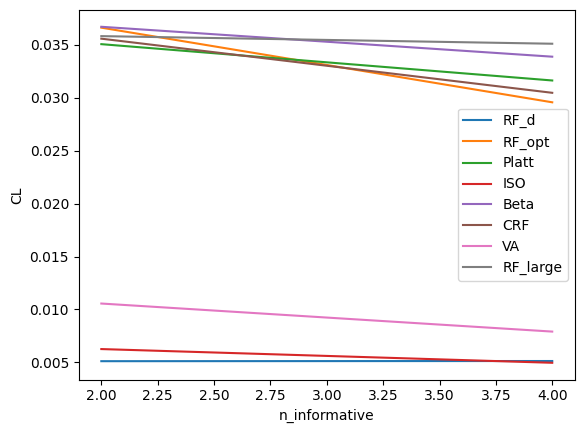

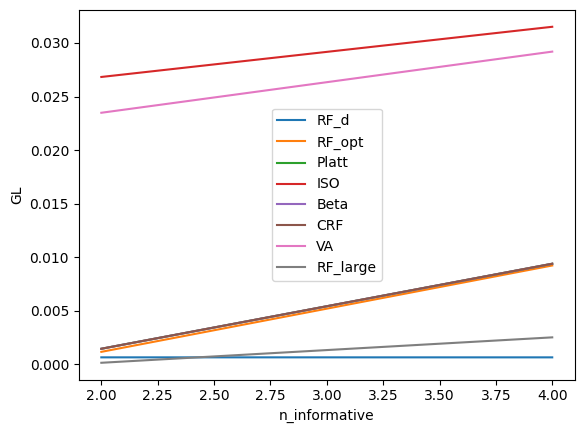

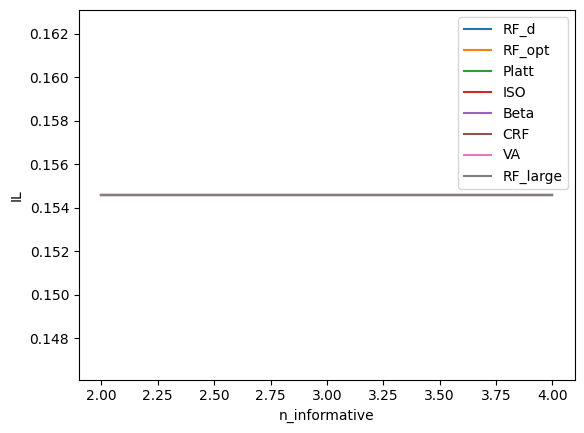

In [8]:
plot_calib_methods = params["calib_methods"].copy()

tables_plot = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables_plot[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)